In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('covid-19-cases-by-notification-date-and-likely-source-of-infection.csv')

In [3]:
data.head()

,notification_date,likely_source_of_infection
0,09-03-20,Overseas or interstate
1,09-03-20,Overseas or interstate
2,09-03-20,Locally acquired - contact of a confirmed case...
3,09-03-20,Overseas or interstate
4,09-03-20,Locally acquired - contact of a confirmed case...


In [4]:
data.describe()

,notification_date,likely_source_of_infection
count,2795,2795
unique,33,4
top,26-03-20,Overseas or interstate
freq,199,1725


In [5]:
sources = list(data['likely_source_of_infection'])
set(sources)

{'Locally acquired - contact not identified',
 'Locally acquired - contact of a confirmed case and/or in a known cluster',
 'Overseas or interstate',
 'Under investigation'}

In [6]:
data['notification_date'] = pd.to_datetime(data['notification_date'],dayfirst=True)

In [7]:
data.head()

,notification_date,likely_source_of_infection
0,2020-03-09,Overseas or interstate
1,2020-03-09,Overseas or interstate
2,2020-03-09,Locally acquired - contact of a confirmed case...
3,2020-03-09,Overseas or interstate
4,2020-03-09,Locally acquired - contact of a confirmed case...


In [8]:
months = data.groupby(data.notification_date.dt.month)

In [10]:
overseas = len(data.query('likely_source_of_infection == "Overseas or interstate"'))
local = len(data.query('likely_source_of_infection == "Locally acquired - contact not identified"')) + len(data.query('likely_source_of_infection == "Locally acquired - contact of a confirmed case and/or in a known cluster"'))
unidentified = len(data.query('likely_source_of_infection == "Under investigation"'))

In [11]:
print(f'The number of cases acquired from overseas in NSW : {overseas}.\n')
print(f'The number of cases acquired locally in NSW : {local}.\n')
print(f'The number of cases acquired from unidenitified sources in NSW : {unidentified}.\n')

The number of cases acquired from overseas in NSW : 1725.

The number of cases acquired locally in NSW : 1021.

The number of cases acquired from unidenitified sources in NSW : 49.



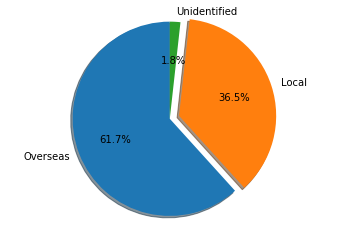

In [12]:
labels = ['Overseas','Local','Unidentified']
no = [overseas,local,unidentified]
explode = (0, 0.1, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(no, labels=labels, explode = explode,autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Text(0, 0.5, 'No. of Infections')

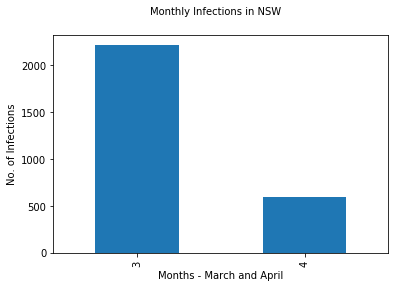

In [27]:
data['notification_date'].groupby(data["notification_date"].dt.month).count().plot(kind="bar")
plt.suptitle('Monthly Infections in NSW', fontsize=10)
plt.xlabel('Months - March and April', fontsize=10)
plt.ylabel('No. of Infections', fontsize=10)

Text(0, 0.5, 'No. of Infections')

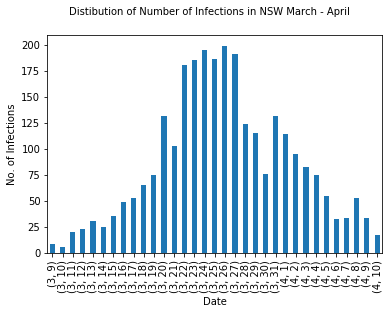

In [28]:
data['notification_date'].groupby([data["notification_date"].dt.month, data["notification_date"].dt.day]).count().
plot(kind="bar")
plt.suptitle('Distibution of Number of Infections in NSW March - April', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('No. of Infections', fontsize=10)

Text(0, 0.5, 'No. of Infections per day')

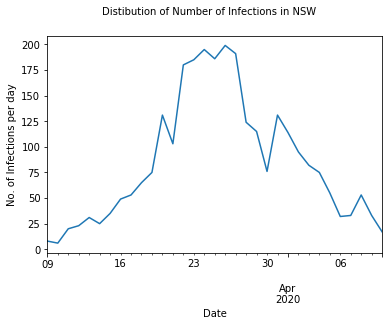

In [35]:
data['notification_date'].groupby(data['notification_date']).count().plot(kind='line')
plt.suptitle('Distibution of Number of Infections in NSW', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('No. of Infections per day', fontsize=10)

In [37]:
count = data['notification_date'].groupby(data['notification_date']).count()

In [42]:
count

notification_date
2020-03-09      8
2020-03-10      6
2020-03-11     20
2020-03-12     23
2020-03-13     31
2020-03-14     25
2020-03-15     35
2020-03-16     49
2020-03-17     53
2020-03-18     65
2020-03-19     75
2020-03-20    131
2020-03-21    103
2020-03-22    180
2020-03-23    185
2020-03-24    195
2020-03-25    186
2020-03-26    199
2020-03-27    191
2020-03-28    124
2020-03-29    115
2020-03-30     76
2020-03-31    131
2020-04-01    114
2020-04-02     95
2020-04-03     82
2020-04-04     75
2020-04-05     55
2020-04-06     32
2020-04-07     33
2020-04-08     53
2020-04-09     33
2020-04-10     17
Name: notification_date, dtype: int64